In [0]:
#importing pyspark library
import pyspark

In [0]:
#importing numpy and pandas libraries
import numpy as np
import pandas as pd

In [0]:
#importing and then creating spark context
from pyspark.context import SparkContext
sc = SparkContext.getOrCreate()

In [0]:
#reading data from csv file in RDD using spark context
TransDataRDD = sc.textFile("FileStore/tables/creditcard_short.csv")

In [0]:
#caching the rdd into the memory
TransDataRDD.cache()

Out[5]: FileStore/tables/creditcard_short.csv MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [0]:
#importing and creating spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [0]:
#reading data from csv file using spark sql and creating dataframe
TransDataDF = spark.read.load('/FileStore/tables/creditcard_short.csv', format = 'csv', header = 'true', inferSchema = 'true')

In [0]:
#converting spark dataframe to pandas dataframe
pdTransDataDF = TransDataDF.toPandas()

In [0]:
#getting data distribution(count of each label) in class frequency variable, some preprocessing then displaying
cf = pdTransDataDF.groupby(["Class"])["Class"].count().reset_index(name = "Count").astype(str)
cf.rename({'Class': 'Transactions'}, axis = 1, inplace = True)
cf.at[0, 'Transactions'] = "normal"
cf.at[1, 'Transactions'] = "fraud"
cf["Count"] = cf["Count"].astype(int)
cf.display()

Transactions,Count
normal,9962
fraud,38


In [0]:
#distributing data equally and creating a new dataframe with data randomly shuffled
fTrans = pdTransDataDF.loc[pdTransDataDF['Class'] == 1]
nTrans = pdTransDataDF.loc[pdTransDataDF['Class'] == 0][:38]

pdTransDataDF_O = pd.concat([fTrans, nTrans])

pdProcessedDF = pdTransDataDF_O.sample(frac = 1, random_state = 20)

pdProcessedDF

,_c0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
14,14,12,-2.791855,-0.327771,1.641750,1.767473,-0.136588,0.807596,-0.422911,-1.907107,...,1.151663,0.222182,1.020586,0.028317,-0.232746,-0.235557,-0.164778,-0.030154,58.80,0.0
9487,9487,14073,-4.153014,8.204797,-15.031714,10.330100,-3.994426,-3.250013,-10.415698,4.620804,...,1.976988,0.256510,0.485908,-1.198821,-0.526567,0.634874,1.627209,0.723235,1.00,1.0
4,4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
31,31,25,1.114009,0.085546,0.493702,1.335760,-0.300189,-0.010754,-0.118760,0.188617,...,-0.053234,-0.004760,-0.031470,0.198054,0.565007,-0.337718,0.029057,0.004453,4.45,0.0
33,33,26,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6899,6899,8878,-2.661802,5.856393,-7.653616,6.379742,-0.060712,-3.131550,-3.103570,1.778492,...,0.734775,-0.435901,-0.384766,-0.286016,1.007934,0.413196,0.280284,0.303937,1.00,1.0
6870,6870,8757,-1.863756,3.442644,-4.468260,2.805336,-2.118412,-2.332285,-4.261237,1.701682,...,0.667927,-0.516242,-0.012218,0.070614,0.058504,0.304883,0.418012,0.208858,1.00,1.0
6427,6427,7610,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1.0
8615,8615,11629,-3.891192,7.098916,-11.426467,8.607557,-2.065706,-2.985288,-8.138589,2.973928,...,1.757085,-0.189709,-0.508629,-1.189308,1.188536,0.605242,1.881529,0.875260,1.00,1.0


In [0]:
#preprocessing data for plotting
pdProcessedDF_temp = pdProcessedDF
pdProcessedDF_temp.rename({'Class': 'Transactions'}, axis = 1, inplace = True)
pdProcessedDF_temp.at[pdProcessedDF_temp["Transactions"] == 0.0] = "normal"
pdProcessedDF_temp.at[pdProcessedDF_temp["Transactions"] == 1.0] = "fraud"
pdProcessedDF = pdTransDataDF_O.sample(frac = 1, random_state = 20)

/databricks/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


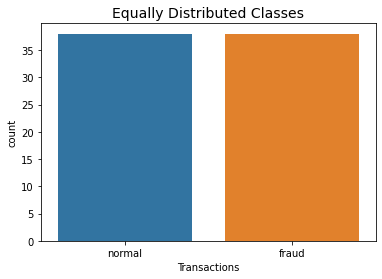

In [0]:
#plotting the labels distribution using countplot
import seaborn as sns
from matplotlib import pyplot as plt

sns.countplot('Transactions', data=pdProcessedDF_temp)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [0]:
#converting pandas dataframe to spark dataframe and tracking rows in new column
from pyspark.sql.functions import *
from pyspark.sql.window import Window

processedDF = spark.createDataFrame(pdProcessedDF)

win = Window().orderBy('Time')
df = processedDF.withColumn("idx", row_number().over(win))

In [0]:
#importing logistic classifier and required evaluators
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorIndexer, VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.linalg import DenseVector

In [0]:
#converting data to vector, organizing data then splitting for training and testing
training_df = df.rdd.map(lambda x: (DenseVector(x[0:30]), x[31], x[32]))
training_df = spark.createDataFrame(training_df, ["features","label","index"])
training_df = training_df.select("index","features","label")
trainData, testData = training_df.randomSplit([0.8, 0.2], seed=1234)

In [0]:
#showing training data count by label
trainData.groupBy("label").count().show()

+-----+-----+
|label|count|
+-----+-----+
|  0.0|   30|
|  1.0|   28|
+-----+-----+



In [0]:
#showing test data count by label
testData.groupBy("label").count().show()

+-----+-----+
|label|count|
+-----+-----+
|  0.0|    8|
|  1.0|   10|
+-----+-----+



In [0]:
#training logistic classifier and predicting test data
lr = LogisticRegression(featuresCol = "features", maxIter = 10, regParam = 0.3, elasticNetParam = 0.8)
model = lr.fit(trainData)
prediction = model.transform(testData)
prediction.groupBy("prediction").count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|       0.0|    8|
|       1.0|   10|
+----------+-----+



In [0]:
#evaluating result
evaluator = BinaryClassificationEvaluator()
evaluator.evaluate(prediction)

Out[39]: 1.0

In [0]:
#showing predicted data count by fraud transactions
prediction = prediction.withColumn("fraudPrediction", when((prediction.label == 1) & (prediction.prediction == 1), 1).otherwise(0))
prediction.groupBy("fraudPrediction").count().show()

+---------------+-----+
|fraudPrediction|count|
+---------------+-----+
|              1|   10|
|              0|    8|
+---------------+-----+



In [0]:
#calculating accuracy
from pyspark.sql.functions import col

fPredicted = prediction.groupBy("fraudPrediction").count().where(prediction.fraudPrediction == 1).head()[1]
fTotal = prediction.groupBy("label").count().where(prediction.label == 1).head()[1]

predictionAccuracy = (fPredicted/fTotal)*100

print("Accuracy: ", str(predictionAccuracy) + "%")

Accuracy:  100.0%


In [0]:
#calculating confusion matrix
tp = prediction[(prediction.label == 1) & (prediction.prediction == 1)].count()
tn = prediction[(prediction.label == 0) & (prediction.prediction == 0)].count()
fp = prediction[(prediction.label == 0) & (prediction.prediction == 1)].count()
fn = prediction[(prediction.label == 1) & (prediction.prediction == 0)].count()
print("True Positive: ",tp,"\nTrue Negative: ",tn,"\nFalse Positive: ",fp,"\nFalse Negative: ",fn)
print("Recall: ",tp/(tp+fn))
print("Precision: ", tp/(tp+fp))

True Positive:  10 
True Negative:  8 
False Positive:  0 
False Negative:  0
Recall:  1.0
Precision:  1.0


In [0]:
#training data on linear regressor
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol = "features", maxIter = 10, regParam = 0.3, elasticNetParam = 0.8)
model = lr.fit(trainData)
prediction = model.transform(testData)
prediction.groupBy("prediction").count().show()

+-------------------+-----+
|         prediction|count|
+-------------------+-----+
| 0.8080868589458144|    1|
| 0.2997963698870884|    1|
| 0.6760698726057204|    1|
|0.30329519542014116|    1|
|   0.30280621268436|    1|
| 0.3029349725609256|    1|
| 0.8303109986520958|    1|
| 0.7923089325207054|    1|
| 0.6564598856322218|    1|
| 0.2972911489005068|    1|
| 0.6698115885473066|    1|
|0.29829475451045223|    1|
| 0.6475743206986702|    1|
| 0.8294194178170844|    1|
| 0.6433960480747916|    1|
|0.29838457496368787|    1|
|0.29572367050666887|    1|
| 0.6727848046749227|    1|
+-------------------+-----+



In [0]:
#training data on decision tree classifier
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(training_df)
featureIndexer = VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(training_df)

dt = DecisionTreeClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures")
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, dt])
model = pipeline.fit(trainData)
prediction = model.transform(testData)

evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(prediction)
print("accuracy: ", accuracy)

treeModel = model.stages[2]
print(treeModel)

accuracy:  1.0
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_76bdc0948391, depth=1, numNodes=3, numClasses=2, numFeatures=30


In [0]:
#training data on random forest classifier
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString

rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", numTrees=10)
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel", labels=labelIndexer.labels)
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, rf, labelConverter])
model = pipeline.fit(trainData)
prediction = model.transform(testData)

evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(prediction)
print("Accuracy: ", accuracy)

rfModel = model.stages[2]
print(rfModel)

#end

Accuracy:  1.0
RandomForestClassificationModel: uid=RandomForestClassifier_9ea2dbd314c4, numTrees=10, numClasses=2, numFeatures=30


In [0]:
#extra operations on Rdds
new_data = ["Data", "Scientist", "Analyst", "engineer", "architect"]
new_data2 = [1, 2, 3, 4, 5]
new_RDD = sc.parallelize(new_data)
new_RDD2 = sc.parallelize(new_data2)
tempV = new_RDD.map(lambda x: len(x))
tempV2 = tempV.reduce(lambda x, y: x + y)
tempV2

Out[42]: 37

In [0]:
def testFunc(x):
    words = x.split(",")
    return len(words)

tempV3 = new_RDD.map(testFunc)
tempV3.collect()

Out[29]: [1, 1, 1, 1, 1]

In [0]:
#broadcast variable example
bV = sc.broadcast([1, 2, 3])

bV.value

Out[30]: [1, 2, 3]

In [0]:
#accumulator example
accum = sc.accumulator(0)
accum.value

Out[40]: 0

In [0]:
#accumulator usage
new_RDD2.foreach(lambda x: accum.add(x))
accum.value

Out[41]: 15

In [0]:
#user defined function example, turns strings in dataframe to uppercase
from pyspark.sql.functions import col, udf
from pyspark.sql.types import StringType

columns = ["id","Name"]
dataTemp = [("1", "ahmed sheikh"),
    ("2", "shahzael"),
    ("3", "azlan atif")]

new_df = spark.createDataFrame(data=dataTemp,schema=columns)

def convertCase(str):
    resStr=""
    arr = str.split(" ")
    for x in arr:
       resStr = resStr + x[0:1].upper() + x[1:len(x)] + " "
    return resStr

convertUDF = udf(lambda x: convertCase(x),StringType())

new_df.select(col("id"), convertUDF(col("Name")).alias("Name")).show(truncate=False)

+---+-------------+
|id |Name         |
+---+-------------+
|1  |Ahmed Sheikh |
|2  |Shahzael     |
|3  |Azlan Atif   |
+---+-------------+



In [0]:
#importing data from JSON strings
jsonStrings = ['{"name":"Ahmed","address":{"city":"Lahore","state":"Punjab"}}']
newTestRDD = sc.parallelize(jsonStrings)
newTest = spark.read.json(newTestRDD)
newTest.show()

+----------------+-----+
|         address| name|
+----------------+-----+
|{Lahore, Punjab}|Ahmed|
+----------------+-----+



In [0]:
#joining dataframe with itself

new_df.join(new_df).show()

+---+------------+---+------------+
| id|        Name| id|        Name|
+---+------------+---+------------+
|  1|ahmed sheikh|  1|ahmed sheikh|
|  1|ahmed sheikh|  2|    shahzael|
|  1|ahmed sheikh|  3|  azlan atif|
|  2|    shahzael|  1|ahmed sheikh|
|  2|    shahzael|  2|    shahzael|
|  2|    shahzael|  3|  azlan atif|
|  3|  azlan atif|  1|ahmed sheikh|
|  3|  azlan atif|  2|    shahzael|
|  3|  azlan atif|  3|  azlan atif|
+---+------------+---+------------+

